In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys
sys.path.append("..")
sys.path.append(os.environ['DH_DIR'])

from tqdm import tqdm
import pickle
import h5py

import numpy as np
from astropy.cosmology import Planck18
# import jax
# import jax.numpy as jnp
# print(jax.devices())

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rc_file('../matplotlibrc')

In [2]:
from dm21cm.field_smoother import WindowedData

In [3]:
! rm ../outputs/tmp/tmp.h5

In [4]:
w = WindowedData(
    data_path="../outputs/tmp/tmp.h5",
    cosmo=Planck18,
    N=50,
    dx=50 / 50,
    cache=True,
)

In [5]:
f = np.ones((50, 50, 50))
s = np.arange(10)
w.set_field(f, s, 1.1)
w.set_field(f, s, 0.9)

In [ ]:
fs, ss = w.get_smoothed_shell(0.5, 1.1, 0.9, 0.1)

In [7]:
with h5py.File("../outputs/tmp/tmp.h5") as hf:
    for k, v in hf.items():
        print(k)

Field_1
Field_2
Spec_1
Spec_2


## Debug

In [4]:
dhinit_soln = pickle.load(open(os.environ['P21C_CACHE_DIR']+'/phph_dhinit_s8zero/dhinit_soln.p', 'rb'))

In [6]:
z_edges = [0,41.56984859939324]

In [27]:
rs_dh = dhinit_soln['rs'][::-1] # increasing now
i_rs_left = np.searchsorted(rs_dh, 1+z_edges[1])
logrs_left = np.log(rs_dh[i_rs_left-1])
logrs_right = np.log(rs_dh[i_rs_left])
logrs = np.log(1+z_edges[1])
dh_spec_N_arr = np.array([s.N for s in dhinit_soln['highengphot']])[::-1]
dh_spec_left = dh_spec_N_arr[i_rs_left-1]
dh_spec_right = dh_spec_N_arr[i_rs_left]
dh_spec = ( dh_spec_left * (logrs_right-logrs) + dh_spec_right * (logrs-logrs_left) ) / (logrs_right-logrs_left)

#phot_bath_spec = Spectrum(photeng, dh_spec, rs=1+z_edges[1], spec_type='N')

In [28]:
print(logrs_left, logrs, logrs_right)

3.7463675676503914 3.751146223324299 3.7583675676503914


In [29]:
np.dot(dh_spec, dhinit_soln['highengphot'][0].eng)

9.098789615855116

In [18]:
z_now = 41.56984859939324

In [30]:
logrs_dh_arr = np.log(dhinit_soln['rs'])[::-1]
logrs = np.log(1+z_now)
i = np.searchsorted(logrs_dh_arr, logrs)
logrs_left, logrs_right = logrs_dh_arr[i-1:i+1]

dh_spec_N_arr = np.array([s.N for s in dhinit_soln['highengphot']])[::-1]
dh_spec_left, dh_spec_right = dh_spec_N_arr[i-1:i+1]
dh_spec2 = ( dh_spec_left * np.abs(logrs - logrs_right) + \
            dh_spec_right * np.abs(logrs - logrs_left) ) / np.abs(logrs_right - logrs_left)
#phot_bath_spec = Spectrum(photeng, dh_spec, rs=1+z_now, spec_type='N')

In [31]:
print(logrs_left, logrs, logrs_right)

3.7463675676503914 3.751146223324299 3.7583675676503914


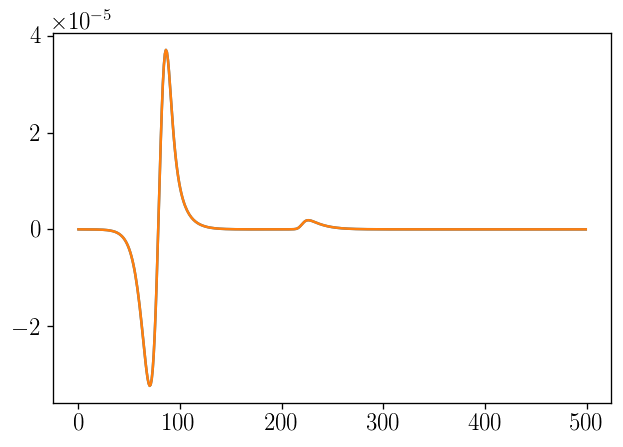

In [32]:
plt.plot(dh_spec)
plt.plot(dh_spec2)

In [15]:
np.dot(dh_spec, dhinit_soln['highengphot'][0].eng)

20.169805028886095

In [ ]:
dh_spec